<a href="https://colab.research.google.com/github/BrendoGarcia/AgendaSenacAPI/blob/main/Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install datetime
!pip install os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 16.2 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

In [ ]:
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [ ]:
if not os.path.exists('dados_cotacoes'):
 os.makedirs('dados_cotacoes')

In [ ]:
data_fim = datetime.now().strftime('%m-%d-%Y')
data_inicio = (datetime.now() - timedelta(days=30)).strftime('%m-%d-%Y')

In [ ]:
moedas = {
 'USD': 'Dólar Americano',
 'EUR': 'Euro',
 'GBP': 'Libra Esterlina',
 'JPY': 'Iene Japonês',
 'ARS': 'Peso Argentino'
}

In [ ]:
dados_cotacoes = {}

In [ ]:
for codigo, nome in moedas.items():
    print(f"Consultando {nome} ({codigo})...")
    url = f"https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoMoedaPeriodo(moeda=@moeda,dataInicial=@dataInicial,dataFinalCotacao=@dataFinalCotacao)?@moeda='{codigo}'&@dataInicial='{data_inicio}'&@dataFinalCotacao='{data_fim}'&$top=100&$format=json"
    response = requests.get(url)
    if response.status_code == 200:
        dados = response.json()
        if 'value' in dados and dados['value']:
            # Extrair os dados de cotação
            cotacoes = []
            for item in dados['value']:
                cotacoes.append({
                    'data': item['dataHoraCotacao'],
                    'cotacao_compra': item['cotacaoCompra'],
                    'cotacao_venda': item['cotacaoVenda']
                })
            # Armazenar no dicionário
            dados_cotacoes[codigo] = {
                'nome': nome,
                'cotacoes': cotacoes
            }
            print(f" ✓ Obtidas {len(cotacoes)} cotações.")
        else:
            print(f" ✗ Nenhum dado de cotação encontrado.")
    else:
        print(f" ✗ Erro ao acessar a API. Código: {response.status_code}")


Consultando Dólar Americano (USD)...
 ✓ Obtidas 100 cotações.
Consultando Euro (EUR)...
 ✓ Obtidas 100 cotações.
Consultando Libra Esterlina (GBP)...
 ✓ Obtidas 100 cotações.
Consultando Iene Japonês (JPY)...
 ✓ Obtidas 100 cotações.
Consultando Peso Argentino (ARS)...
 ✗ Nenhum dado de cotação encontrado.


In [ ]:
for codigo, dados in dados_cotacoes.items():
    if dados['cotacoes']:
        df = pd.DataFrame(dados['cotacoes'])
        # Converter a coluna de data
        df['data'] = pd.to_datetime(df['data'])
        # Ordenar por data
        df = df.sort_values('data')
        # Salvar em CSV
        arquivo_csv = f'dados_cotacoes/cotacao_{codigo}.csv'
        df.to_csv(arquivo_csv, index=False, encoding='utf-8-sig')
        print(f" ✓ Arquivo '{arquivo_csv}' criado com sucesso!")


 ✓ Arquivo 'dados_cotacoes/cotacao_USD.csv' criado com sucesso!
 ✓ Arquivo 'dados_cotacoes/cotacao_EUR.csv' criado com sucesso!
 ✓ Arquivo 'dados_cotacoes/cotacao_GBP.csv' criado com sucesso!
 ✓ Arquivo 'dados_cotacoes/cotacao_JPY.csv' criado com sucesso!


 ✓ Gráfico 'dados_cotacoes/grafico_todas_moedas.png' criado com sucesso!


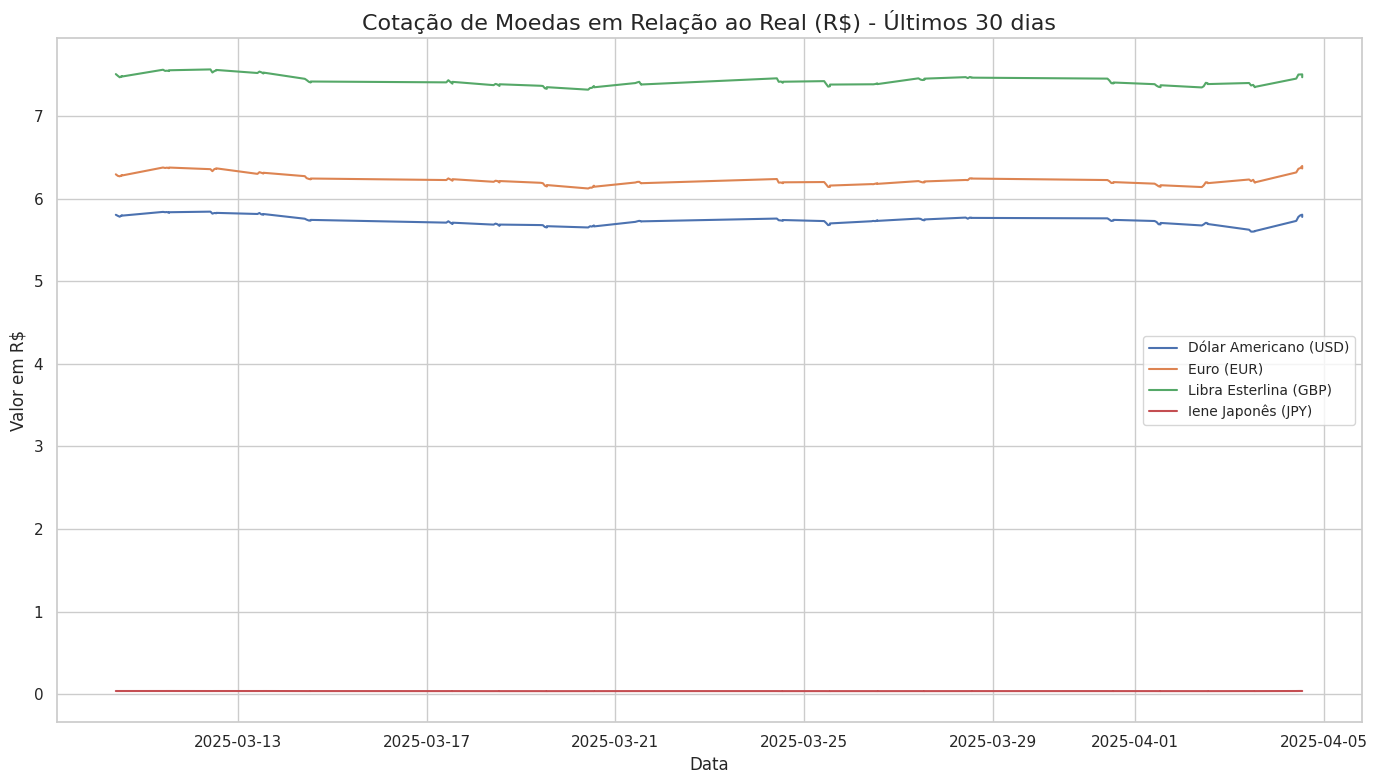

In [ ]:
plt.figure(figsize=(14, 8))
for codigo, dados in dados_cotacoes.items():
    if dados['cotacoes']:
        df = pd.DataFrame(dados['cotacoes'])
        df['data'] = pd.to_datetime(df['data'])
        df = df.sort_values('data')
        plt.plot(df['data'], df['cotacao_venda'], label=f"{dados['nome']} ({codigo})")
plt.title('Cotação de Moedas em Relação ao Real (R$) - Últimos 30 dias', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor em R$', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
arquivo_grafico = 'dados_cotacoes/grafico_todas_moedas.png'
plt.savefig(arquivo_grafico, dpi=300)
print(f" ✓ Gráfico '{arquivo_grafico}' criado com sucesso!")


 ✓ Gráfico 'dados_cotacoes/grafico_USD.png' criado com sucesso!
 ✓ Gráfico 'dados_cotacoes/grafico_EUR.png' criado com sucesso!
 ✓ Gráfico 'dados_cotacoes/grafico_GBP.png' criado com sucesso!
 ✓ Gráfico 'dados_cotacoes/grafico_JPY.png' criado com sucesso!


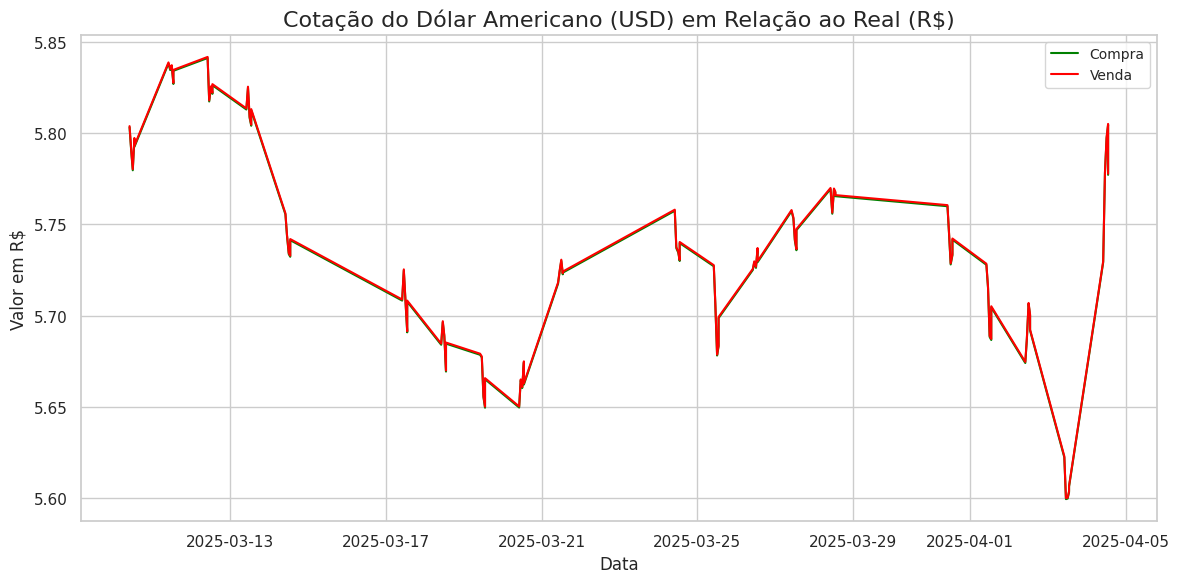

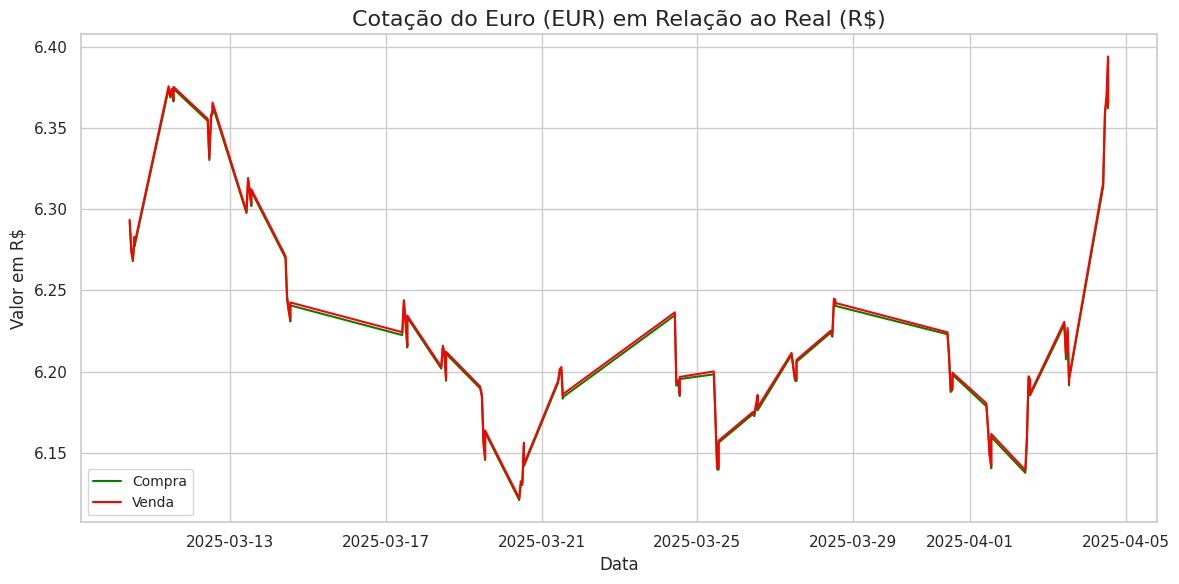

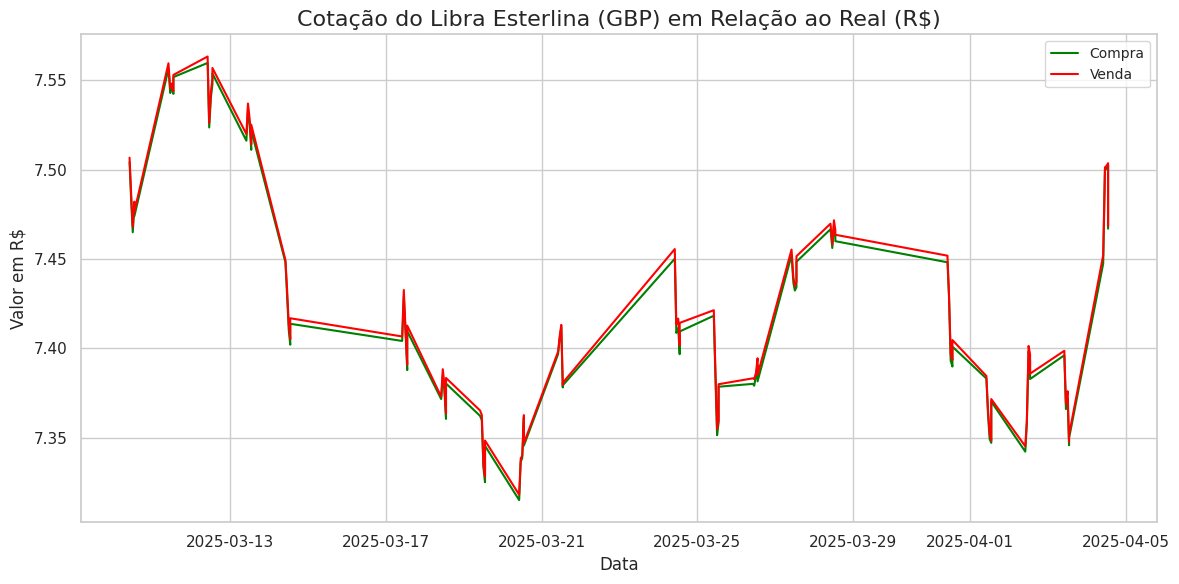

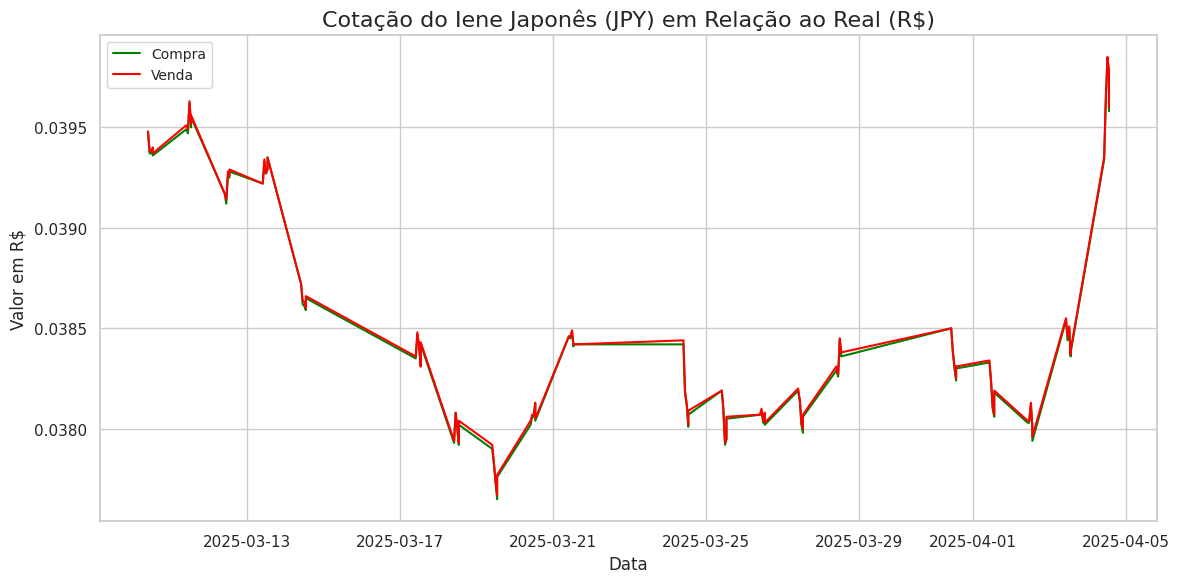

In [ ]:
for codigo, dados in dados_cotacoes.items():
    if dados['cotacoes']:
        plt.figure(figsize=(12, 6))
        df = pd.DataFrame(dados['cotacoes'])
        df['data'] = pd.to_datetime(df['data'])
        df = df.sort_values('data')
        plt.plot(df['data'], df['cotacao_compra'], label='Compra', color='green', linestyle='-')
        plt.plot(df['data'], df['cotacao_venda'], label='Venda', color='red', linestyle='-')
        plt.title(f'Cotação do {dados["nome"]} ({codigo}) em Relação ao Real (R$)', fontsize=16)
        plt.xlabel('Data', fontsize=12)
        plt.ylabel('Valor em R$', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True)
        plt.tight_layout()
        arquivo_grafico = f'dados_cotacoes/grafico_{codigo}.png'
        plt.savefig(arquivo_grafico, dpi=300)
        print(f" ✓ Gráfico '{arquivo_grafico}' criado com sucesso!")


 ✓ Gráfico 'dados_cotacoes/grafico_variacao_percentual.png' criado com sucesso!


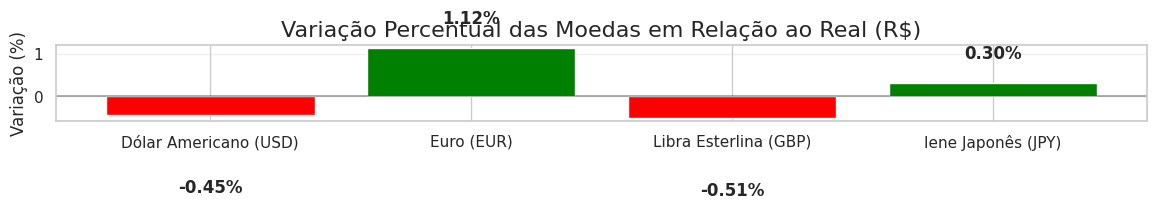

In [ ]:
plt.figure(figsize=(12, 7))
variacoes = []
nomes = []
for codigo, dados in dados_cotacoes.items():
    if dados['cotacoes'] and len(dados['cotacoes']) >= 2:
        df = pd.DataFrame(dados['cotacoes'])
        df['data'] = pd.to_datetime(df['data'])
        df = df.sort_values('data')
        # Calcular variação percentual
        primeiro_valor = df.iloc[0]['cotacao_venda']
        ultimo_valor = df.iloc[-1]['cotacao_venda']
        variacao_pct = ((ultimo_valor - primeiro_valor) / primeiro_valor) * 100
        variacoes.append(variacao_pct)
        nomes.append(f"{dados['nome']} ({codigo})")
# Criar cores baseadas na variação (positiva = verde, negativa = vermelha)
cores = ['green' if var >= 0 else 'red' for var in variacoes]
# Criar gráfico de barras
plt.bar(nomes, variacoes, color=cores)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
# Adicionar rótulos com os valores
for i, v in enumerate(variacoes):
    plt.text(i, v + (0.5 if v >= 0 else -1.5), f"{v:.2f}%",
             ha='center', va='bottom' if v >= 0 else 'top', fontweight='bold')
plt.title('Variação Percentual das Moedas em Relação ao Real (R$)', fontsize=16)
plt.ylabel('Variação (%)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
arquivo_grafico = 'dados_cotacoes/grafico_variacao_percentual.png'
plt.savefig(arquivo_grafico, dpi=300)
print(f" ✓ Gráfico '{arquivo_grafico}' criado com sucesso!")


In [ ]:
print("\nResumo dos dados coletados:")
for codigo, dados in dados_cotacoes.items():
    if dados['cotacoes']:
        df = pd.DataFrame(dados['cotacoes'])
        df['data'] = pd.to_datetime(df['data'])  # Conversão necessária
        print(f"\n{dados['nome']} ({codigo}):")
        print(f" - Período: {df['data'].min().strftime('%d/%m/%Y')} a {df['data'].max().strftime('%d/%m/%Y')}")
        print(f" - Cotação mínima: R$ {df['cotacao_venda'].min():.4f}")
        print(f" - Cotação máxima: R$ {df['cotacao_venda'].max():.4f}")
        print(f" - Cotação média: R$ {df['cotacao_venda'].mean():.4f}")



Resumo dos dados coletados:

Dólar Americano (USD):
 - Período: 10/03/2025 a 04/04/2025
 - Cotação mínima: R$ 5.6000
 - Cotação máxima: R$ 5.8417
 - Cotação média: R$ 5.7331

Euro (EUR):
 - Período: 10/03/2025 a 04/04/2025
 - Cotação mínima: R$ 6.1220
 - Cotação máxima: R$ 6.3942
 - Cotação média: R$ 6.2295

Libra Esterlina (GBP):
 - Período: 10/03/2025 a 04/04/2025
 - Cotação mínima: R$ 7.3181
 - Cotação máxima: R$ 7.5632
 - Cotação média: R$ 7.4256

Iene Japonês (JPY):
 - Período: 10/03/2025 a 04/04/2025
 - Cotação mínima: R$ 0.0377
 - Cotação máxima: R$ 0.0398
 - Cotação média: R$ 0.0385
